### Importing the Necessary Libraries

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm

### Getting the Data

In [15]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


<hr>

## Visualisations

### 1. For the "Median value of owner-occupied homes" provide a boxplot.

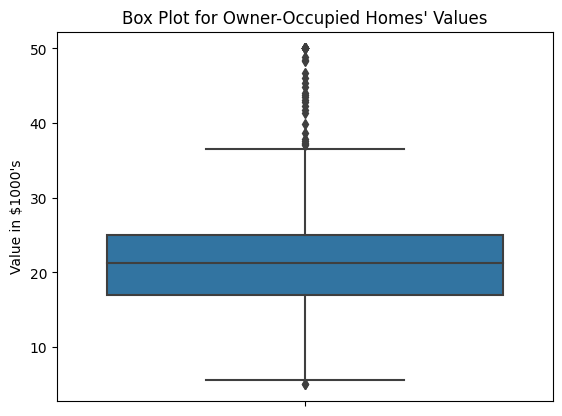

In [16]:
graph = sns.boxplot(y = 'MEDV', data = boston_df)
graph.set(ylabel="Value in $1000's", title="Box Plot for Owner-Occupied Homes' Values")
plt.show()

### 2. Provide a  bar plot for the Charles river variable.

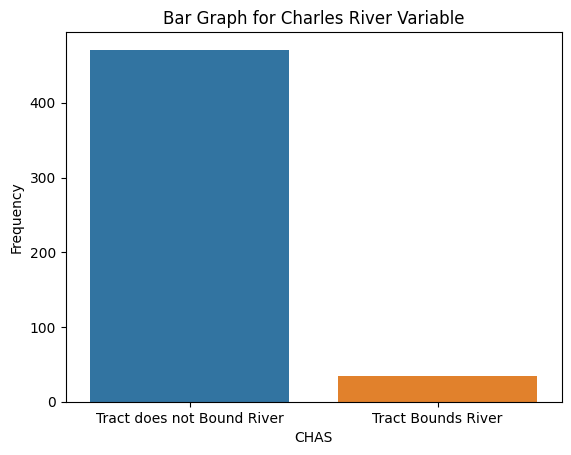

In [17]:
graph = sns.countplot(x=boston_df['CHAS'])
graph.set(ylabel="Frequency", title="Bar Graph for Charles River Variable")
graph.set_xticklabels(['Tract does not Bound River', 'Tract Bounds River'])
plt.show()

### 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

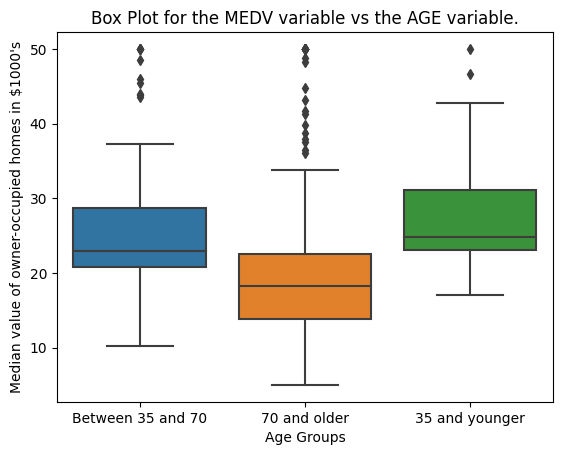

In [18]:
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

graph = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
graph.set(xlabel="Age Groups", ylabel="Median value of owner-occupied homes in $1000's", title="Box Plot for the MEDV variable vs the AGE variable.")
plt.show()

### 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

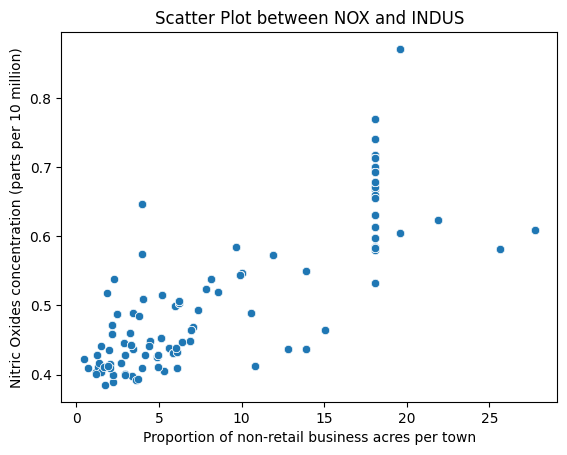

In [19]:
graph = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
graph.set(xlabel = "Proportion of non-retail business acres per town", ylabel="Nitric Oxides concentration (parts per 10 million)", title="Scatter Plot between NOX and INDUS")
plt.show()

### 5. Create a histogram for the pupil to teacher ratio variable.

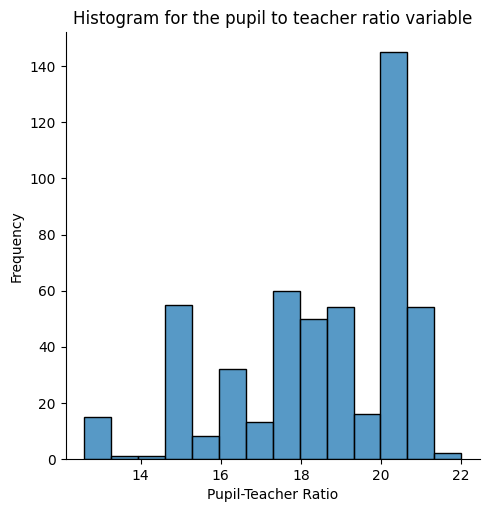

In [20]:
graph = sns.displot(boston_df['PTRATIO'])
graph.set(xlabel="Pupil-Teacher Ratio", ylabel = "Frequency", title="Histogram for the pupil to teacher ratio variable")
plt.show()

<hr>

## Questions

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### Hypothesis-

$\alpha = 0.05$

#### Null Hypothesis:

$H_{0}:µ_{1}=µ_{2}$

There is no difference in median value of houses bounded by the Charles river

#### Alternative Hypothesis:

$H_{1}:µ_{1}≠µ_{2}$

There is a difference in median value of houses bounded by the Charles river

In [21]:
sp.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

### Conclusion-
As the P-Value comes out to be $1.4651540072350996e-305$, which is lesser than $\alpha$, we reject the Null Hypothesis as there is enough proof that there is a statistical difference in in median value of houses bounded by the Charles river.

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
### Hypothesis-
$\alpha=0.05$

#### Null Hypothesis:
$H_{0}:µ_{1}=µ_{2}=µ_{3}$

The 3 population means are Equal.
#### Alternative Hypothesis:
$H_{1}:$ At least one of the means Differ.

In [22]:
younger35 = boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV']
between3570 = boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV']
older70 = boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV']

sp.stats.f_oneway(younger35, between3570, older70)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

### Conclusion-
As the P-Value comes out to be $1.135217093487225e-14$, which is smaller than $\alpha$, we reject the Null Hypothesis as there is enough proof that there is a statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

### Hypothesis-
$\alpha=0.05$
#### Null Hypothesis
$H_{0}:$  There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
#### Alternative Hypothesis
$H_{1}:$  There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [23]:
sp.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209158, pvalue=7.913361061232845e-98)

### Conclusion-
As the P-Value comes out to be $7.913361061232845e-98$ which is lesser than $\alpha$, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
### Hypothesis-
$\alpha=0.05$
#### Null Hypothesis:
$H_{0}:{\beta}_{1}=0$

There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
#### Alternative Hypothesis:
$H_{1}:{\beta}_{1}\neq0$

There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

In [24]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        20:09:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion-
As the P-Value is less than $\alpha$, we reject the Null Hypothesis as there is evidence that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.